<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionales1/blob/main/Semana15/MCMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install emcee
!pip install corner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 2.0 MB/s eta 0:00:00


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import emcee
import corner
import os
from google.colab import drive
import scipy.optimize as spo

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [8]:
os.chdir("/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI")
!ls

Parcial2    Semana10  Semana13	Semana2  Semana5  Semana8
ProyectoML  Semana11  Semana14	Semana3  Semana6  Semana9
Semana1     Semana12  Semana15	Semana4  Semana7


In [9]:
file = '/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/Semana15/Data/Gaussiano.csv'
data = pd.read_csv(file)
x = data['x']

In [10]:
X = np.array(data['x'])

In [11]:
def Gaus(p,x):
  mu, sigma = p
  return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))

In [12]:
def LogPrior(p):
  mu, sigma = p
  if -10 < mu < 10 and 0 < sigma < 20:
    return 0.
  else:
    return -np.inf

In [13]:
def Likelihood(p,x):
  return Gaus(p,x)

In [14]:
def JointLikelihood(p,x):
  return +np.sum(np.log(Likelihood(p,x))) # La distribucion posterior es positiva

In [17]:
JointLikelihood([1,1.5],X)

np.float64(-406.9096896360665)

In [18]:
def LogPosterior(p,x):
  LogP = LogPrior(p)
  if not np.isfinite(LogP):
    return -np.inf
  else:
    return LogP + JointLikelihood(p,x)

In [21]:
LogPosterior([100,3],X)

-inf

In [27]:
# Stuff package
n_walkers, n_params = 10, 2
p0 = np.zeros((n_walkers, n_params))
p0[:,0] = 2
p0[:,1] = 1
p0 += np.random.randn(n_walkers, n_params)
p0

array([[ 3.07525487,  1.78809821],
       [-0.89964816,  0.61671844],
       [-0.45963187,  0.70203998],
       [ 0.82107321,  0.88278147],
       [ 4.06029989,  0.76915801],
       [ 2.54027105,  0.66913106],
       [ 1.76019491,  0.29590257],
       [ 2.52301645,  2.45395972],
       [ 1.29295484, -0.71918893],
       [ 2.56311757,  1.07923744]])

In [28]:
sampler = emcee.EnsembleSampler(n_walkers, n_params, LogPosterior, args=(X,))
pos,prob,state = sampler.run_mcmc(p0,10000,progress=True)

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-14-aaf43e0cdd33>:2: RuntimeWarning: divide by zero encountered in log
  return +np.sum(np.log(Likelihood(p,x))) # La distribucion posterior es positiva
100%|██████████| 10000/10000 [00:07<00:00, 1250.47it/s]


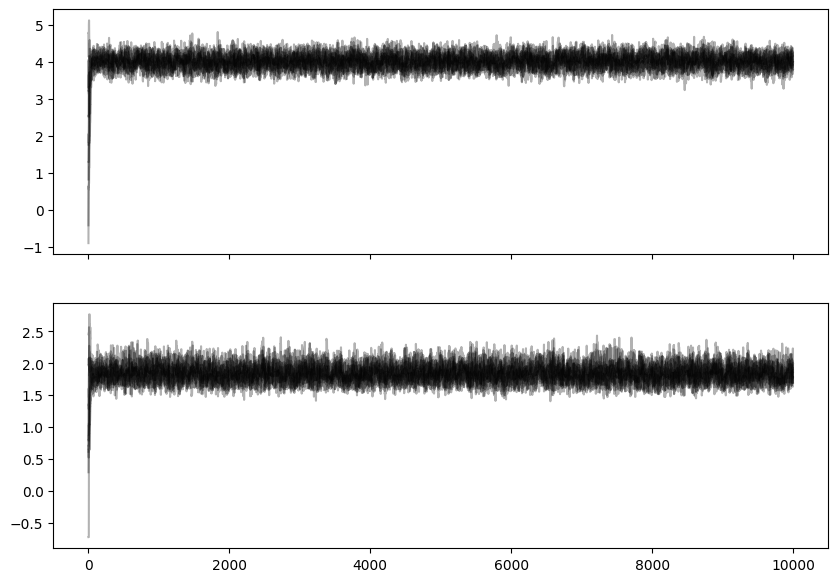

In [29]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)

samples = sampler.get_chain()
labels = ["mu", "sigma"]
for i in range(2):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)

In [31]:
# Vamos a quemar
flat_samples = sampler.get_chain(discard=500, thin=15, flat=True)
truths = np.percentile(flat_samples, 50, axis=0)
truths

array([4.01138728, 1.83243444])

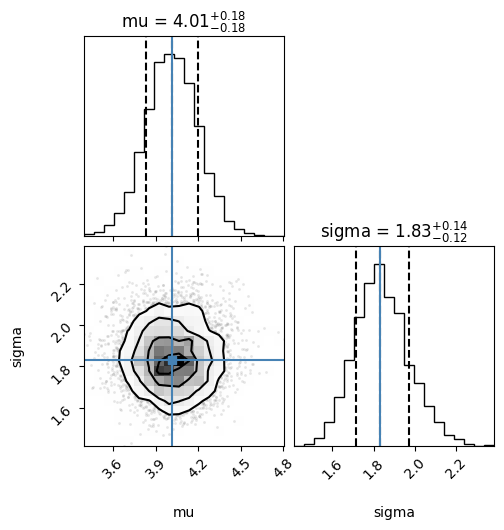

In [35]:
figure = corner.corner(flat_samples, labels=labels, truths=truths, quantiles=[0.16,0.5,0.84], show_titles=True)